<a href="https://colab.research.google.com/github/MrCat2357/Principios-de-Imageamento-Digital/blob/main/vc_catulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a.    
Abrir e carregar a imagem disponibilizada (original.png);


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


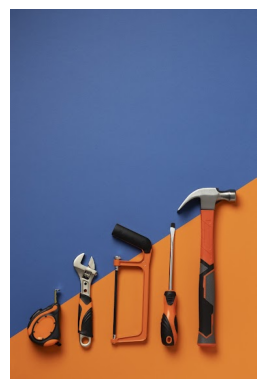

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')


img = cv2.imread("/content/original.jpg")

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

b.    
Listar a seguintes propriedades dessa imagem: tamanho,
valores máximos, valores mínimos e média de intensidade;


In [ ]:
# O tamanho dessa matriz/imagem é determinada pelo número de colunas/largura (m) e linhas/altura (n) da matriz (m x n).
img.shape

(567, 378, 3)

567 pixels de altura, 378 de largura e 3 canais de cores

Máximo, mínimo e médio das intensidades:

In [ ]:
# Máximo
img.max()

255

In [ ]:
# Mínimo
img.min()

0

In [ ]:
# Médio
intensity_mean = np.mean(img)
intensity_mean

111.71090768268898

c.    
Deslocar essa imagem 30 pixels para direita e 30 para baixo e
salvar imagem como (rot_01.png).

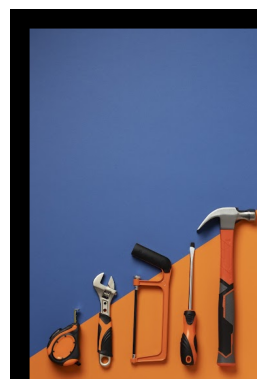

True

In [ ]:

# Deslocar a imagem
deslocamento_x = 30
deslocamento_y = 30
linhas, colunas, _ = img.shape
M = np.float32([[1, 0, deslocamento_x], [0, 1, deslocamento_y]])
img_deslocada = cv2.warpAffine(img, M, (colunas, linhas))

# Mostrar a imagem deslocada
plt.imshow(cv2.cvtColor(img_deslocada, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# Salvar a imagem deslocada
cv2.imwrite("/content/rot_01.png", img_deslocada)

d.    
Separar os canais da imagem “original.png” salvar uma imagem
no canal R (originalR.png), outra no G (originalG.png)e outra no
B(originalB.png).

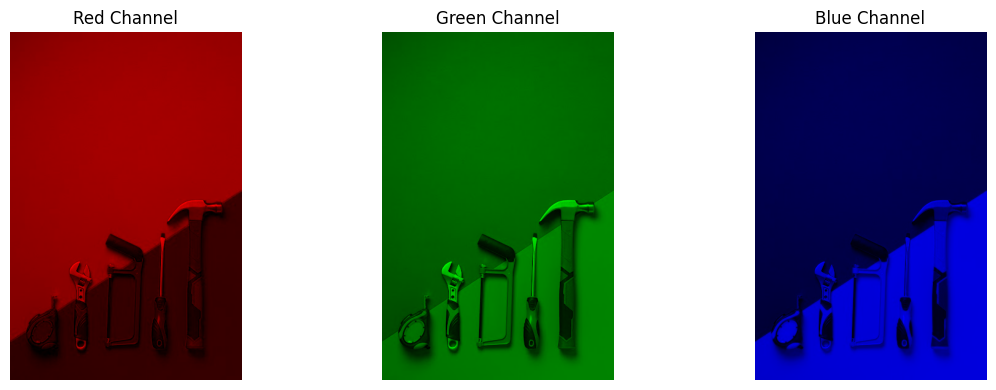

In [ ]:

# Dividir a imagem em seus canais de cor
r, g, b = cv2.split(img)

# Criar imagens coloridas para cada canal
blue_img = np.zeros_like(img)
blue_img[:,:,0] = b  # Atribui o canal azul ao canal azul da imagem

green_img = np.zeros_like(img)
green_img[:,:,1] = g  # Atribui o canal verde ao canal verde da imagem

red_img = np.zeros_like(img)
red_img[:,:,2] = r  # Atribui o canal vermelho ao canal vermelho da imagem

# Salvando as imagens (leva um tempo até o colab reconhecer as imagens salvas)
cv2.imwrite("originalR.png", red_img)
cv2.imwrite("originalG.png", green_img)
cv2.imwrite("originalB.png", blue_img)

# Configuração do subplot
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Mostrando as imagens lado a lado
axes[0].imshow(cv2.cvtColor(red_img, cv2.COLOR_BGR2RGB))
axes[0].set_title('Red Channel')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(green_img, cv2.COLOR_BGR2RGB))
axes[1].set_title('Green Channel')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(blue_img, cv2.COLOR_BGR2RGB))
axes[2].set_title('Blue Channel')
axes[2].axis('off')

plt.tight_layout()
plt.show()



e.    
Calcule o histograma da imagem “original.png”;

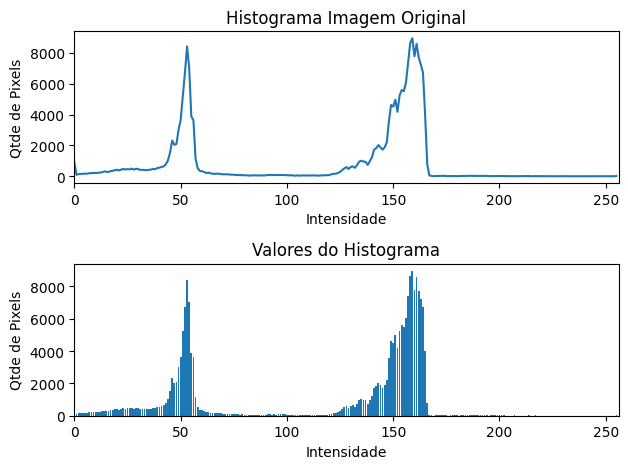

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Calcular o histograma da imagem
hist_original = cv2.calcHist([img], [0], None, [256], [0, 256])

# Plotar o histograma
plt.figure()

plt.subplot(2, 1, 1)  # Criar uma subplot para o gráfico do histograma
plt.title("Histograma Imagem Original")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.plot(hist_original)
plt.xlim([0, 256])

plt.subplot(2, 1, 2)  # Criar uma subplot para exibir os valores do histograma
plt.title("Valores do Histograma")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.bar(range(len(hist_original)), hist_original.flatten())
plt.xlim([0, 256])

plt.tight_layout()  # Ajustar layout para evitar sobreposição de subplots
plt.show()


f.      Faça a segmentação
por Limiarização (Thresholding Global) e quantifique as partes evidenciadas
pela segmentação.

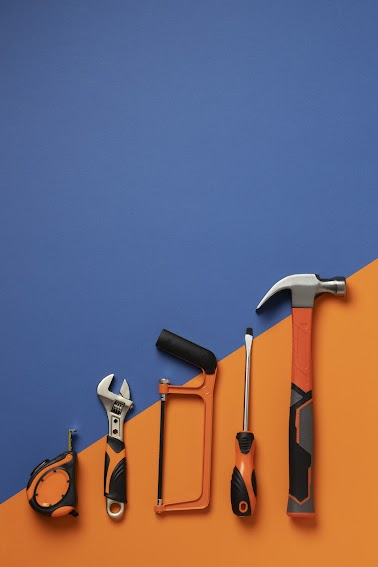

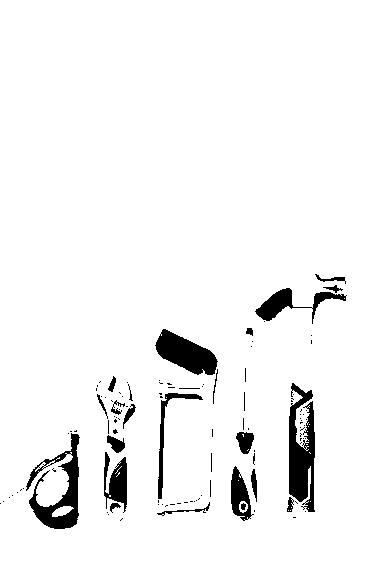

In [ ]:
from google.colab.patches import cv2_imshow
# Converter a imagem para tons de cinza
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicar a limiarização (thresholding)
_,binary_image = cv2.threshold(gray_image, 66, 255, cv2.THRESH_BINARY)

# Exibir a imagem original e a imagem binarizada
cv2_imshow(img)
cv2_imshow(binary_image)

Pela limiarização, conseguimos identificar os 5 objetos